In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os
import statsmodels.api as sm


In [2]:
# Loading your data
curr_dir = os.getcwd()
df = pd.read_csv(curr_dir + "/A1_all_data_compressed/A1_stock_volatility_labeled.csv")
print("Shape of the dataset: ", df.shape)
df.head(10)

Shape of the dataset:  (13486, 22)


,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
0,2022-01-01,164.634,144.954,165.074,136.849,40101533,5.732915e+09,148.347000,-12.188473,1.795721,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,2.550000e+08,-79000000.0,-5.460000e+08,A
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,2.550000e+08,-79000000.0,-5.460000e+08,A
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,2.550000e+08,-79000000.0,-5.460000e+08,A
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,5.380000e+08,-155000000.0,-6.690000e+08,A
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,5.380000e+08,-155000000.0,-6.690000e+08,A
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,5.380000e+08,-155000000.0,-6.690000e+08,A
6,2022-07-01,124.844,140.154,140.554,119.074,27261533,3.351761e+09,128.601000,12.470509,2.167925,...,2.710000e+09,2.95,1.048000e+10,5.393000e+09,5.091000e+09,1.071000e+09,8.640000e+08,-228000000.0,-1.031000e+09,A
7,2022-08-01,139.564,134.304,155.054,133.209,32067005,4.305568e+09,139.247478,-4.173980,2.221199,...,2.710000e+09,2.95,1.048000e+10,5.393000e+09,5.091000e+09,1.071000e+09,8.640000e+08,-228000000.0,-1.031000e+09,A
8,2022-09-01,133.684,127.604,146.054,126.654,31680890,4.097576e+09,134.879714,-4.988682,1.642976,...,2.710000e+09,2.95,1.048000e+10,5.393000e+09,5.091000e+09,1.071000e+09,8.640000e+08,-228000000.0,-1.031000e+09,A
9,2022-10-01,128.994,144.614,145.574,127.944,27011517,3.517686e+09,137.057810,13.330303,2.125559,...,3.722000e+09,4.19,1.053000e+10,5.227000e+09,5.305000e+09,1.053000e+09,1.312000e+09,-338000000.0,-1.372000e+09,A


In [3]:
print("Summary Statistics for the Dataset:")
print(df.describe())

print("\nMissing Values in the Dataset:")
print(df.isnull().sum())

print("\nData Types of Columns:")
print(df.dtypes)


Summary Statistics for the Dataset:
                Open          Close           High            Low  \
count   13486.000000   13486.000000   13486.000000   13486.000000   
mean     1741.328666    1735.367690    1829.655853    1637.911281   
std     15564.852252   15628.651843   16210.989075   14950.536329   
min         0.011000       0.010000       0.011000       0.008000   
25%        22.710000      22.330000      24.750000      20.180000   
50%        87.560000      86.645000      93.975000      81.372500   
75%       356.460000     352.652750     377.180000     325.060000   
max    402207.744000  403313.664000  408310.579000  394660.864000   

             Volume        Amount      Avg_Price        Return    Volatility  \
count  1.348600e+04  1.348600e+04   13486.000000  13486.000000  13486.000000   
mean   4.112382e+07  3.228092e+09    1733.197353     -0.700045      2.396125   
std    1.211088e+08  1.660591e+10   15573.457915     13.110310      2.033964   
min    4.210000e+02  1

In [4]:
df["Stock"].value_counts().sum()

13486

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13486 entries, 0 to 13485
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       13486 non-null  object 
 1   Open                       13486 non-null  float64
 2   Close                      13486 non-null  float64
 3   High                       13486 non-null  float64
 4   Low                        13486 non-null  float64
 5   Volume                     13486 non-null  int64  
 6   Amount                     13486 non-null  float64
 7   Avg_Price                  13486 non-null  float64
 8   Return                     13486 non-null  float64
 9   Volatility                 13486 non-null  float64
 10  Revenue                    13486 non-null  float64
 11  Net Income                 13486 non-null  float64
 12  Gross Profit               13486 non-null  float64
 13  EPS                        13486 non-null  flo

In [7]:
df.describe()

,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,Revenue,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
count,13486.000000,13486.000000,13486.000000,13486.000000,1.348600e+04,1.348600e+04,13486.000000,13486.000000,13486.000000,1.348600e+04,1.348600e+04,1.348600e+04,13486.000000,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04
mean,1741.328666,1735.367690,1829.655853,1637.911281,4.112382e+07,3.228092e+09,1733.197353,-0.700045,2.396125,7.754660e+09,7.171438e+08,2.857836e+09,1.949710,1.821612e+10,1.091715e+10,7.298849e+09,1.510022e+09,1.178012e+09,-7.025812e+08,-4.600039e+08
std,15564.852252,15628.651843,16210.989075,14950.536329,1.211088e+08,1.660591e+10,15573.457915,13.110310,2.033964,3.128756e+10,3.993453e+09,1.130077e+10,5.161378,5.717197e+10,3.217662e+10,2.944286e+10,7.989450e+09,5.928045e+09,3.328101e+09,3.485262e+09
min,0.011000,0.010000,0.011000,0.008000,4.210000e+02,1.746700e+04,0.010455,-84.347826,0.000000,1.400000e+04,-1.672000e+10,-2.746000e+09,-84.600000,1.410000e+07,2.479000e+06,-8.940000e+09,4.300000e+04,-4.109000e+09,-7.097000e+10,-6.976000e+10
25%,22.710000,22.330000,24.750000,20.180000,3.879474e+06,1.125653e+08,22.486262,-6.911791,1.345456,2.733000e+08,-6.500000e+05,1.013000e+08,-0.050000,7.990500e+08,3.497000e+08,2.705000e+08,5.024000e+07,5.240000e+05,-2.515500e+08,-2.350000e+08
50%,87.560000,86.645000,93.975000,81.372500,1.145391e+07,4.743543e+08,87.345952,-1.090276,1.980023,1.040000e+09,6.012000e+07,4.060000e+08,0.990000,2.858000e+09,1.556000e+09,9.840000e+08,1.861000e+08,8.319000e+07,-4.824000e+07,-2.264000e+07
75%,356.460000,352.652750,377.180000,325.060000,3.204557e+07,2.097197e+09,351.217239,4.979387,3.001239,3.500750e+09,3.140000e+08,1.422000e+09,2.860000,9.482000e+09,6.084000e+09,3.111000e+09,5.940000e+08,4.441500e+08,-6.422000e+06,7.465000e+06
max,402207.744000,403313.664000,408310.579000,394660.864000,2.908660e+09,6.206421e+11,402330.624000,480.000000,149.476478,6.113000e+11,8.948000e+10,2.252000e+11,52.470000,5.772000e+11,3.906000e+11,4.035000e+11,1.837000e+11,1.459000e+11,2.138000e+10,2.425000e+10


In [8]:
df.isnull().sum()

Date                         0
Open                         0
Close                        0
High                         0
Low                          0
Volume                       0
Amount                       0
Avg_Price                    0
Return                       0
Volatility                   0
Revenue                      0
Net Income                   0
Gross Profit                 0
EPS                          0
Total Assets                 0
Total Liabilities            0
Total Equity                 0
Cash and Cash Equivalents    0
Operating Cash Flow          0
Investing Cash Flow          0
Financing Cash Flow          0
Stock                        0
dtype: int64

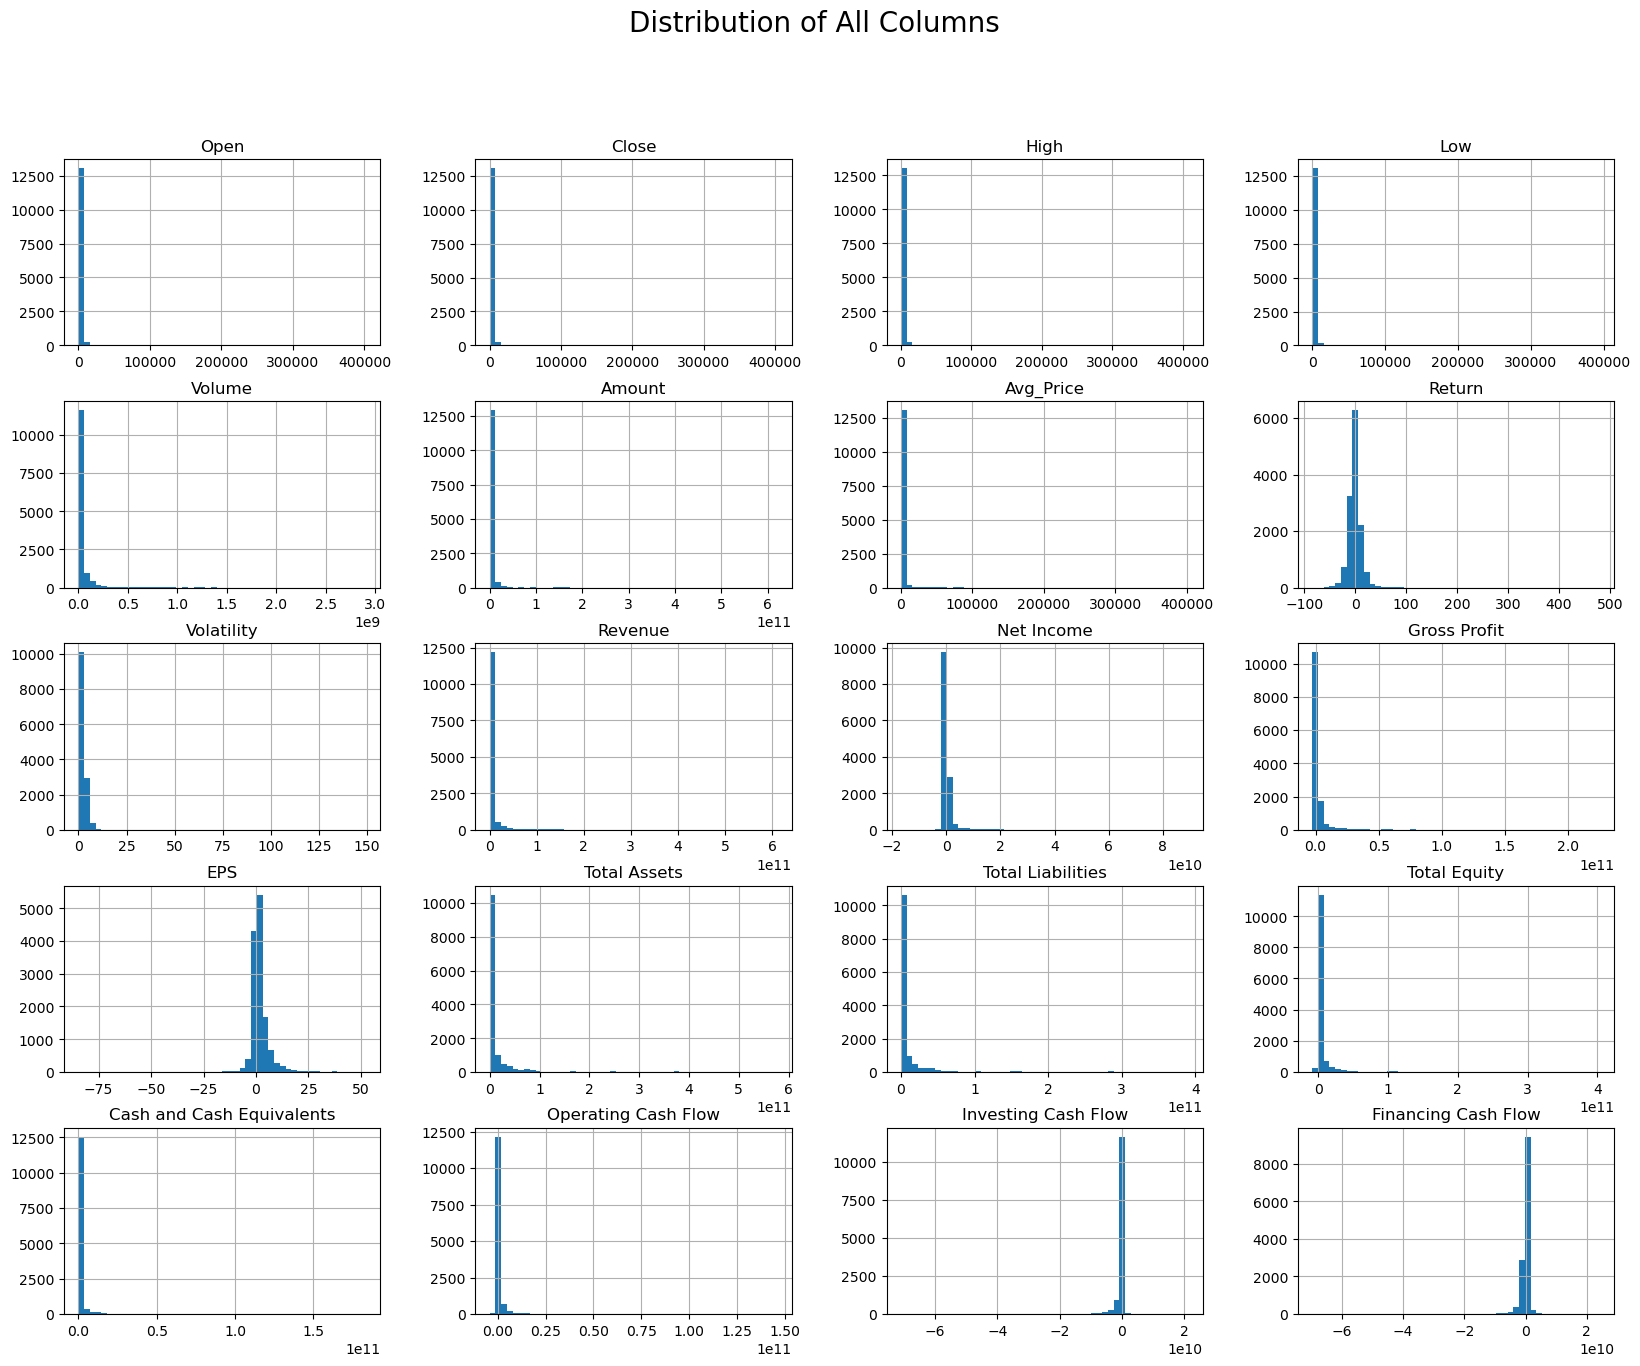

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribution of All Columns", fontsize=20)
plt.show()

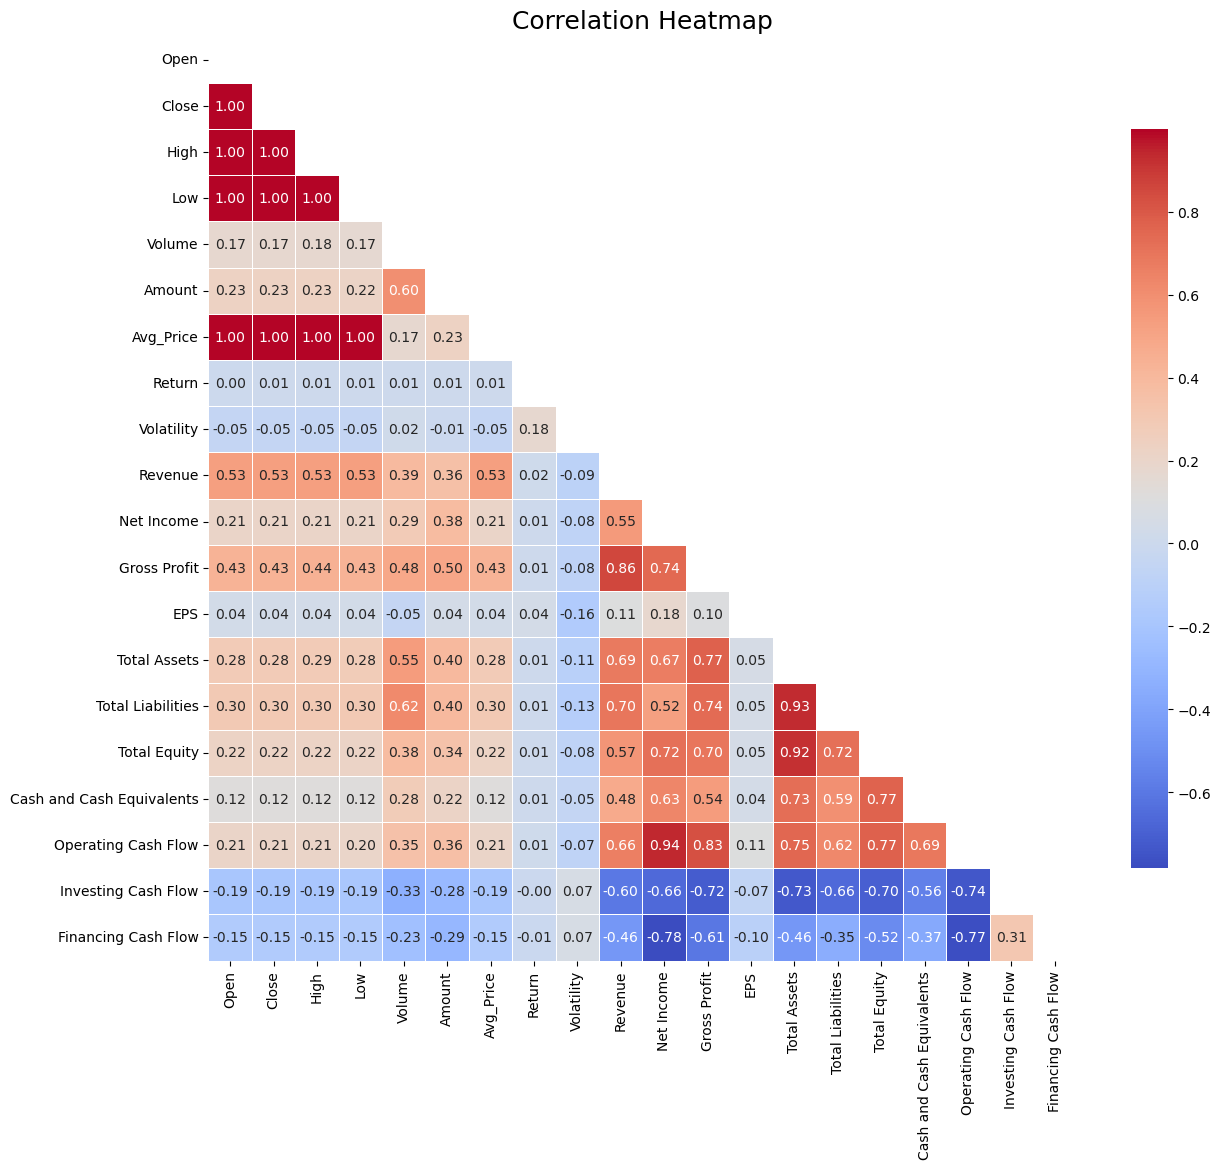

In [16]:
# Keep only the numeric columns in the dataframe
data_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix to see how the numeric features are related
corr_mat = data_numeric.corr()

# Set the size of the figure to make it easy to read
plt.figure(figsize=(14, 12))

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Plot the heatmap with numbers on the cells and a color map for visual effect
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, 
            cbar_kws={"shrink": .8}, linewidths=0.5, annot_kws={"size": 10})

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=18)

# Display the final plot
plt.show()


In [11]:
def outliers_detect(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    l_b = Q1 - 1.5 * IQR
    u_b = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < l_b) | (df[column] > u_b)]
    
    return len(outliers)

columns_to_check = df.select_dtypes(include=[np.number])

outlier_counts = {column: outliers_detect(df, column) for column in columns_to_check}
for column, count in outlier_counts.items():
    print(f"Column: {column} - Number of Outliers: {count}")

Column: Open - Number of Outliers: 1967
Column: Close - Number of Outliers: 1977
Column: High - Number of Outliers: 1970
Column: Low - Number of Outliers: 2036
Column: Volume - Number of Outliers: 1483
Column: Amount - Number of Outliers: 1615
Column: Avg_Price - Number of Outliers: 1992
Column: Return - Number of Outliers: 766
Column: Volatility - Number of Outliers: 613
Column: Revenue - Number of Outliers: 1793
Column: Net Income - Number of Outliers: 2096
Column: Gross Profit - Number of Outliers: 1770
Column: EPS - Number of Outliers: 1297
Column: Total Assets - Number of Outliers: 2003
Column: Total Liabilities - Number of Outliers: 1992
Column: Total Equity - Number of Outliers: 1925
Column: Cash and Cash Equivalents - Number of Outliers: 1950
Column: Operating Cash Flow - Number of Outliers: 2012
Column: Investing Cash Flow - Number of Outliers: 2262
Column: Financing Cash Flow - Number of Outliers: 2948


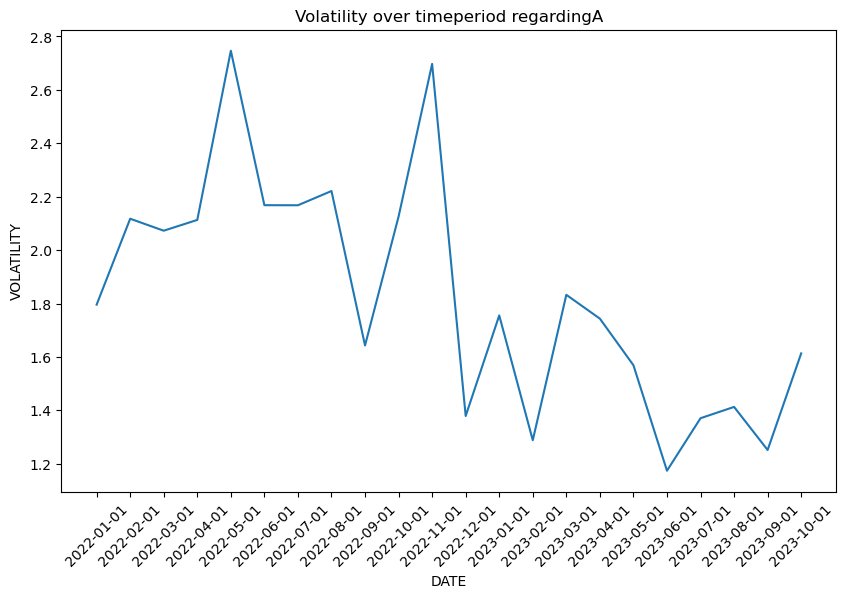

In [18]:
stock_sample = df[df['Stock'] == df['Stock'].unique()[0]]

plt.figure(figsize=(10, 6))
plt.plot(stock_sample['Date'], stock_sample['Volatility'])
plt.title(f'Volatility over timeperiod regarding{sample_stock["Stock"].unique()[0]}')
plt.xlabel('DATE')
plt.ylabel('VOLATILITY')
plt.xticks(rotation=45)
plt.show()

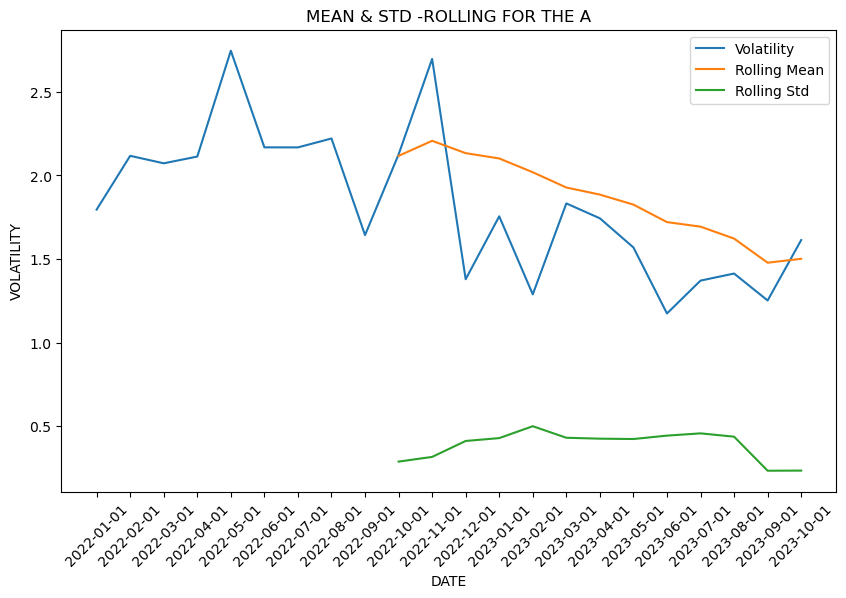

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(stock_sample['Date'], stock_sample['Volatility'], label='Volatility')
plt.plot(stock_sample['Date'], stock_sample['Volatility'].rolling(window=10).mean(), label='Rolling Mean')
plt.plot(stock_sample['Date'], stock_sample['Volatility'].rolling(window=10).std(), label='Rolling Std')
plt.title(f'MEAN & STD -ROLLING FOR THE {stock_sample["Stock"].unique()[0]}')
plt.xlabel('DATE')
plt.ylabel('VOLATILITY')
plt.legend()
plt.xticks(rotation=45)
plt.show()

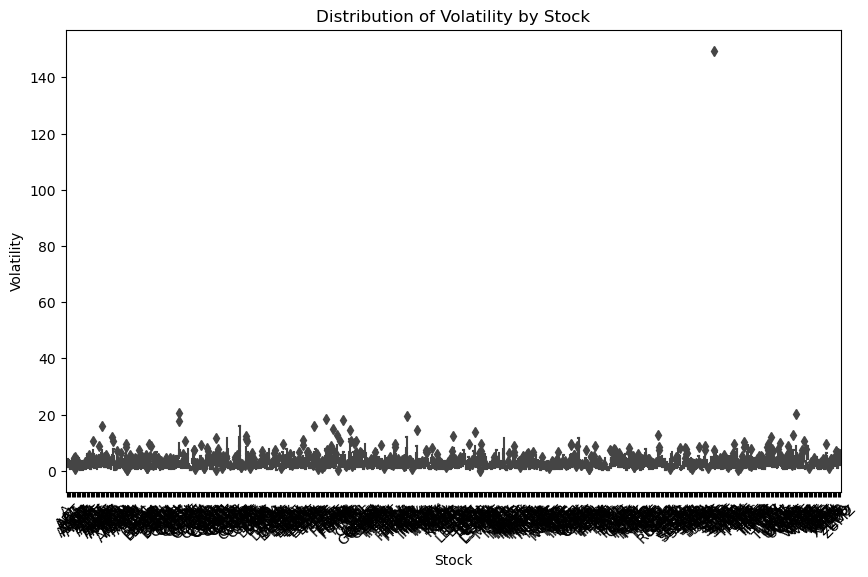

In [14]:
# Boxplot of Volatility by Stock
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stock', y='Volatility', data=df)
plt.title('Distribution of Volatility by Stock')
plt.xticks(rotation=45)
plt.show()


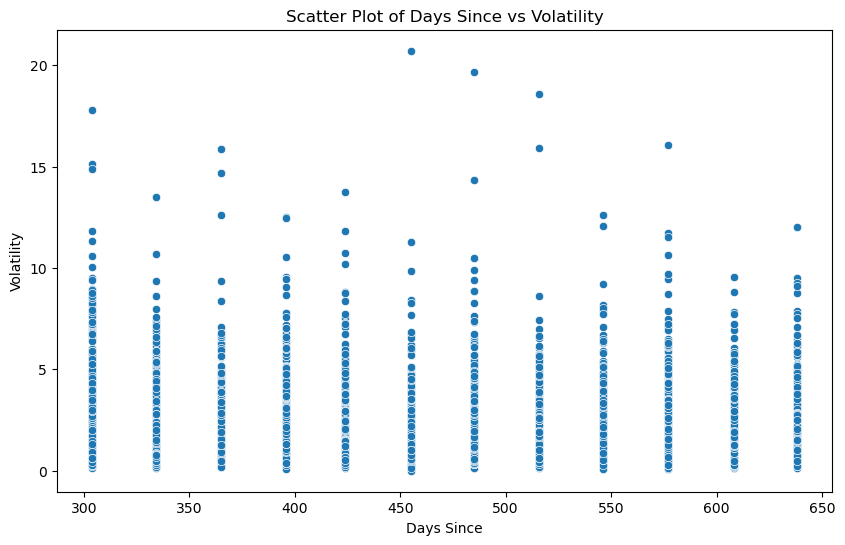

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_Since', y='Volatility', data=lagged_df_clean)
plt.title('Scatter Plot of Days Since vs Volatility')
plt.xlabel('Days Since')
plt.ylabel('Volatility')
plt.show()


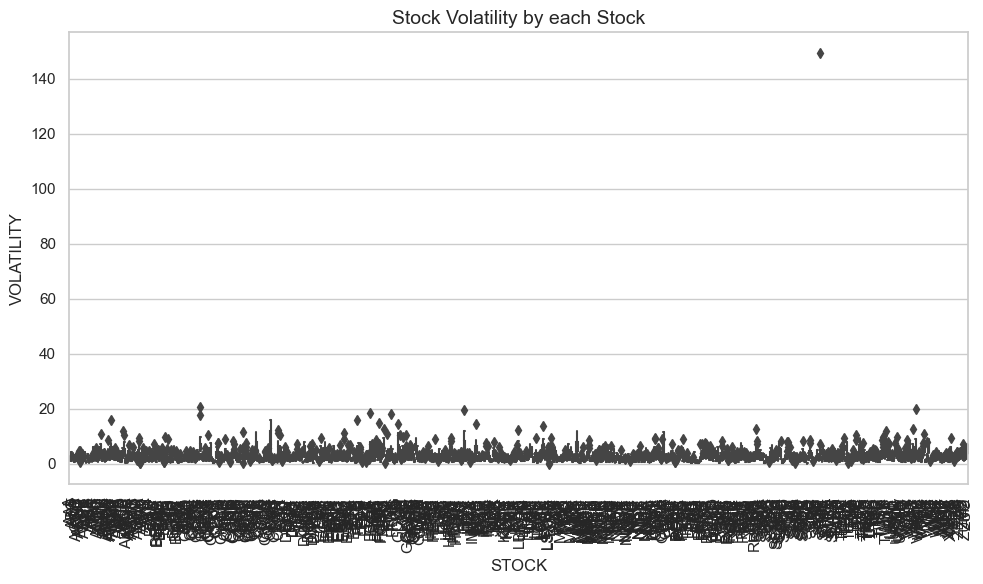

In [38]:
# Choose the columns we want to use for the plot
selected_cols = ['Stock', 'Volatility']

# Set a nice, clean style for the plot
sns.set(style="whitegrid")

# Create a box plot to show the distribution of volatility for each stock
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stock', y='Volatility', data=df[selected_cols])

# Add titles and labels for the axes
plt.title('Stock Volatility by each Stock', fontsize=14)
plt.xlabel('STOCK', fontsize=12)
plt.ylabel('VOLATILITY', fontsize=12)

# Rotate the x-axis labels so they don't overlap and are easier to read
plt.xticks(rotation=90)

# Make sure the layout looks nice and doesn't cut off anything
plt.tight_layout()

# Show the final plot
plt.show()


## Pre Processing the Data 

In [5]:
df = df.sort_values(by=['Stock', 'Date'])

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Days_Since'] = (df['Date'] - df['Date'].min()).dt.days


In [7]:
# Create new columns for lagged volatility values (only up to the last 10 months)
lagged_df = pd.DataFrame()

# Loop through each unique stock in the dataset
for stock in df['Stock'].unique():
    # Get all the data for the current stock
    stock_data = df[df['Stock'] == stock].copy()
    
    # Create lagged columns for the past 10 months
    for i in range(1, 11):
        stock_data[f'volatilitylag_{i}'] = stock_data['Volatility'].shift(i)
    
    # Combine the data for this stock with the rest of the lagged data
    lagged_df = pd.concat([lagged_df, stock_data], axis=0)


In [8]:
# Remove rows that have missing values in the lagged columns (Volatility_Lag_1 to Volatility_Lag_10)
lagged_df_clean = lagged_df.dropna(subset=[f'volatilitylag_{i}' for i in range(1, 11)])

# Print the number of remaining rows after dropping the missing values
print(f"Remaining samples after dropna: {lagged_df_clean.shape[0]}")


Remaining samples after dropna: 7356


C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


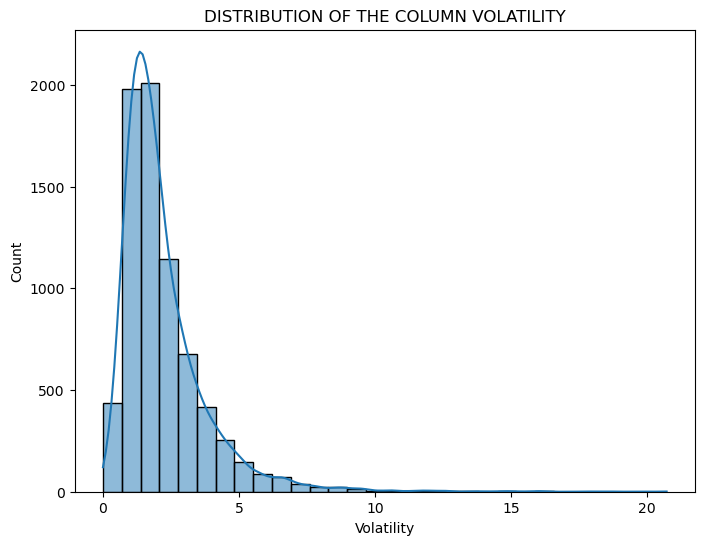

In [29]:
# Set the size of the figure for better visibility
plt.figure(figsize=(8, 6))

# Create a histogram to show the distribution of the 'Volatility' column
# Add a kernel density estimate (kde) to show the smoothed curve
sns.histplot(lagged_df_clean['Volatility'], bins=30, kde=True)

# Add a title to the plot
plt.title('DISTRIBUTION OF THE COLUMN VOLATILITY')

# Display the plot
plt.show()


C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

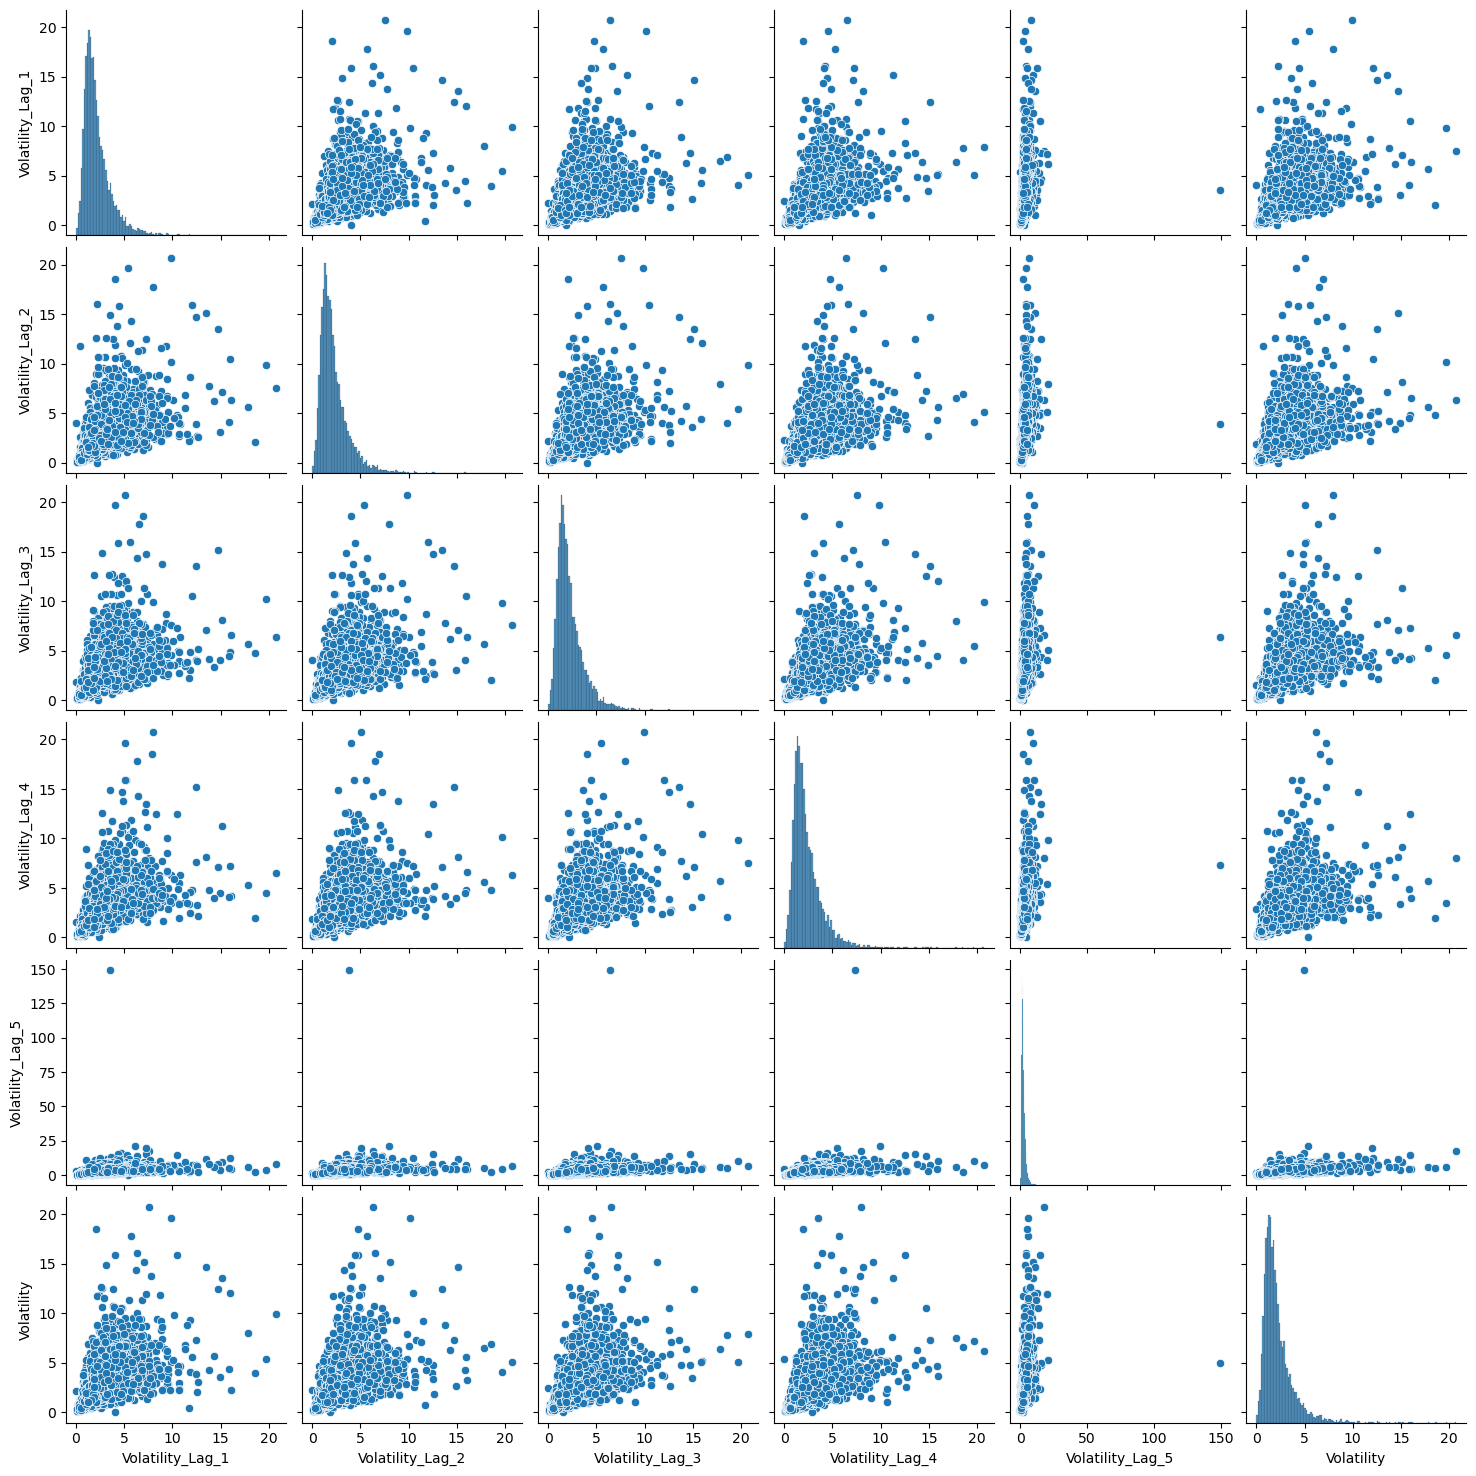

In [12]:
# Create a pair plot to visualize relationships between lagged volatility features and current volatility
sns.pairplot(lagged_df_clean[[f'Volatility_Lag_{i}' for i in range(1, 6)] + ['Volatility']])

# Display the plot
plt.show()


In [13]:
df.head(10)

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock,Days_Since
0,2022-01-01,164.634,144.954,165.074,136.849,40101533,5.732915e+09,148.347000,-12.188473,1.795721,...,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,2.550000e+08,-79000000.0,-5.460000e+08,A,0
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,2.550000e+08,-79000000.0,-5.460000e+08,A,31
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,2.550000e+08,-79000000.0,-5.460000e+08,A,59
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,5.380000e+08,-155000000.0,-6.690000e+08,A,90
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,5.380000e+08,-155000000.0,-6.690000e+08,A,120
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,5.380000e+08,-155000000.0,-6.690000e+08,A,151
6,2022-07-01,124.844,140.154,140.554,119.074,27261533,3.351761e+09,128.601000,12.470509,2.167925,...,2.95,1.048000e+10,5.393000e+09,5.091000e+09,1.071000e+09,8.640000e+08,-228000000.0,-1.031000e+09,A,181
7,2022-08-01,139.564,134.304,155.054,133.209,32067005,4.305568e+09,139.247478,-4.173980,2.221199,...,2.95,1.048000e+10,5.393000e+09,5.091000e+09,1.071000e+09,8.640000e+08,-228000000.0,-1.031000e+09,A,212
8,2022-09-01,133.684,127.604,146.054,126.654,31680890,4.097576e+09,134.879714,-4.988682,1.642976,...,2.95,1.048000e+10,5.393000e+09,5.091000e+09,1.071000e+09,8.640000e+08,-228000000.0,-1.031000e+09,A,243
9,2022-10-01,128.994,144.614,145.574,127.944,27011517,3.517686e+09,137.057810,13.330303,2.125559,...,4.19,1.053000e+10,5.227000e+09,5.305000e+09,1.053000e+09,1.312000e+09,-338000000.0,-1.372000e+09,A,273


In [11]:
# Create Exponential Moving Averages (EMA) for Volatility Lags with different spans
for span in [3, 5, 10]:
    lagged_df_clean[f'Volatility_ema_{span}'] = (
        lagged_df_clean.groupby('Stock')['volatilitylag_1'].transform(lambda x: x.ewm(span=span).mean())
    )


# Calculate the Volatility Range (difference between Lag_1 and Lag_5)
lagged_df_clean['Volatility_Range'] = lagged_df_clean['volatilitylag_1'] - lagged_df_clean['volatilitylag_5']

# Create a new feature by multiplying Lag_1 and Lag_2 (interaction between lags)
lagged_df_clean['lag1_lag2_interaction'] = lagged_df_clean['volatilitylag_1'] * lagged_df_clean['volatilitylag_2']

# Create time-based features like 'Quarter' and whether it's the end of the year
lagged_df_clean['Quarter'] = pd.to_datetime(lagged_df_clean['Date']).dt.quarter
lagged_df_clean['stock_year_end'] = (pd.to_datetime(lagged_df_clean['Date']).dt.month == 12).astype(int)


# Calculate stock-specific summary statistics (mean, median, max volatility)
lagged_df_clean['Volatility_Mean'] = lagged_df_clean.groupby('Stock')['Volatility'].transform('mean')
lagged_df_clean['Volatility_Median'] = lagged_df_clean.groupby('Stock')['Volatility'].transform('median')
lagged_df_clean['Volatility_Max'] = lagged_df_clean.groupby('Stock')['Volatility'].transform('max')

# Drop rows with missing values created by feature engineering
lagged_df_clean = lagged_df_clean.dropna()

# Combine all features for training
stock_lag = [f'volatilitylag_{i}' for i in range(1, 11)] + ['Days_Since', 'lag1_lag2_interaction']
stock_ema_features = [f'Volatility_ema_{span}' for span in [3, 5, 10]]
stock_interactions = ['Volatility_Range', 'lag1_lag2_interaction']
stock_time_faturs = ['Quarter', 'stock_year_end']
stats_stocks = ['Volatility_Mean', 'Volatility_Median', 'Volatility_Max']

# Combine all feature lists
all_features = stock_lag + stock_ema_features + stock_interactions + stock_time_faturs + stats_stocks

X = lagged_df_clean[all_features]
y = lagged_df_clean['Volatility']

In [13]:
X = lagged_df_clean[all_features]
y = lagged_df_clean['Volatility']
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())
p_values = ols_model.pvalues
print("P-values of the features:\n", p_values)

                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     747.9
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:05:01   Log-Likelihood:                -9857.9
No. Observations:                7356   AIC:                         1.976e+04
Df Residuals:                    7335   BIC:                         1.990e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.23

In [16]:

# Define parameter grids for SVR and Random Forest
svr_params_grid = {
    'C': [0.1, 1.0, 10],  # SVR regularization parameter
    'epsilon': [0.01, 0.1, 0.5],  # SVR epsilon for error tolerance
    'kernel': ['linear', 'rbf']  # SVR kernel options
}

rf_params_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5]  # Minimum number of samples required to split a node
}

# Split data into train and test sets (80% for training, 20% for testing)
train_size = int(0.8 * X.shape[0])
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Initialize variables to store the best combination of parameters and metrics
best_combination = {'SVR': {}, 'RandomForest': {}, 'Metrics': {}}
best_test_r2 = -np.inf  # Start with a very low R-squared for comparison

# Loop over all possible combinations of SVR and Random Forest parameters
for C in svr_params_grid['C']:
    for epsilon in svr_params_grid['epsilon']:
        for kernel in svr_params_grid['kernel']:
            for n_estimators in rf_params_grid['n_estimators']:
                for max_depth in rf_params_grid['max_depth']:
                    for min_samples_split in rf_params_grid['min_samples_split']:

                        # Initialize SVR with the current parameters
                        svr_model = SVR(C=C, epsilon=epsilon, kernel=kernel)

                        # Initialize Random Forest with the current parameters
                        rf_model = RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            random_state=42
                        )

                        # Train SVR on the training data
                        svr_model.fit(X_train, y_train)

                        # Get predictions from SVR for both training and test sets
                        svr_train_preds = svr_model.predict(X_train)
                        svr_test_preds = svr_model.predict(X_test)

                        # Add SVR predictions as new features for Random Forest
                        X_train_stack = np.column_stack([X_train, svr_train_preds])
                        X_test_stack = np.column_stack([X_test, svr_test_preds])

                        # Train Random Forest using the SVR predictions as features
                        rf_model.fit(X_train_stack, y_train)

                        # Get predictions from Random Forest for both training and test sets
                        rf_train_preds = rf_model.predict(X_train_stack)
                        rf_test_preds = rf_model.predict(X_test_stack)

                        # Calculate R-squared and RMSE for both sets
                        train_r2 = r2_score(y_train, rf_train_preds)
                        test_r2 = r2_score(y_test, rf_test_preds)
                        train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
                        test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

                        # Print the current combination of parameters and metrics
                        print(f"SVR Params: C={C}, epsilon={epsilon}, kernel={kernel}")
                        print(f"Random Forest Params: n_estimators={n_estimators}, max_depth={max_depth}, min_samples_split={min_samples_split}")
                        print(f"Training R-squared: {train_r2:.4f}, Testing R-squared: {test_r2:.4f}")
                        print(f"Training RMSE: {train_rmse:.4f}, Testing RMSE: {test_rmse:.4f}")
                        print("-" * 50)

                        # Save the best combination based on test R-squared
                        if test_r2 > best_test_r2:
                            best_test_r2 = test_r2
                            best_combination['SVR'] = {'C': C, 'epsilon': epsilon, 'kernel': kernel}
                            best_combination['RandomForest'] = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
                            best_combination['Metrics'] = {
                                'train_r2': train_r2, 'test_r2': test_r2,
                                'train_rmse': train_rmse, 'test_rmse': test_rmse
                            }

# Display the best combination of hyperparameters and the corresponding results
print(f"Best SVR Params: {best_combination['SVR']}")
print(f"Best Random Forest Params: {best_combination['RandomForest']}")
print(f"Best Test R-squared: {best_combination['Metrics']['test_r2']:.4f}")
print(f"Best Test RMSE: {best_combination['Metrics']['test_rmse']:.4f}")


SVR Params: C=0.1, epsilon=0.01, kernel=linear
Random Forest Params: n_estimators=50, max_depth=5, min_samples_split=2
Training R-squared: 0.7275, Testing R-squared: 0.6739
Training RMSE: 0.8526, Testing RMSE: 0.8680
--------------------------------------------------
SVR Params: C=0.1, epsilon=0.01, kernel=linear
Random Forest Params: n_estimators=50, max_depth=5, min_samples_split=5
Training R-squared: 0.7252, Testing R-squared: 0.6741
Training RMSE: 0.8562, Testing RMSE: 0.8677
--------------------------------------------------
SVR Params: C=0.1, epsilon=0.01, kernel=linear
Random Forest Params: n_estimators=50, max_depth=10, min_samples_split=2
Training R-squared: 0.8732, Testing R-squared: 0.6669
Training RMSE: 0.5816, Testing RMSE: 0.8773
--------------------------------------------------
SVR Params: C=0.1, epsilon=0.01, kernel=linear
Random Forest Params: n_estimators=50, max_depth=10, min_samples_split=5
Training R-squared: 0.8615, Testing R-squared: 0.6714
Training RMSE: 0.6077

In [9]:
if lagged_df_clean.shape[0] > 0:  # Check if we have any data left after cleaning
    # Create Exponential Moving Averages (EMA) for Volatility Lags with different spans
    for span in [3, 5, 10]:
        lagged_df_clean[f'Volatility_ema_{span}'] = (
            lagged_df_clean.groupby('Stock')['volatilitylag_1'].transform(lambda x: x.ewm(span=span).mean())
        )

    # Calculate the Volatility Range (difference between Lag_1 and Lag_5)
    lagged_df_clean['Volatility_Range'] = lagged_df_clean['volatilitylag_1'] - lagged_df_clean['volatilitylag_5']

    # Create a new feature by multiplying Lag_1 and Lag_2 (interaction between lags)
    lagged_df_clean['lag1_lag2_interaction'] = lagged_df_clean['volatilitylag_1'] * lagged_df_clean['volatilitylag_2']

    # Create time-based features like 'Quarter' and whether it's the end of the year
    lagged_df_clean['Quarter'] = pd.to_datetime(lagged_df_clean['Date']).dt.quarter
    lagged_df_clean['stock_year_end'] = (pd.to_datetime(lagged_df_clean['Date']).dt.month == 12).astype(int)

    # Calculate stock-specific summary statistics (mean, median, max volatility)
    lagged_df_clean['Volatility_Mean'] = lagged_df_clean.groupby('Stock')['Volatility'].transform('mean')
    lagged_df_clean['Volatility_Median'] = lagged_df_clean.groupby('Stock')['Volatility'].transform('median')
    lagged_df_clean['Volatility_Max'] = lagged_df_clean.groupby('Stock')['Volatility'].transform('max')

    # Drop rows with missing values created by feature engineering
    lagged_df_clean = lagged_df_clean.dropna()

    # Combine all features for training
    stock_lag = [f'volatilitylag_{i}' for i in range(1, 11)] + ['Days_Since', 'lag1_lag2_interaction']
    stock_ema_features = [f'Volatility_ema_{span}' for span in [3, 5, 10]]
    stock_interactions = ['Volatility_Range', 'lag1_lag2_interaction']
    stock_time_faturs = ['Quarter', 'stock_year_end']
    stats_stocks = ['Volatility_Mean', 'Volatility_Median', 'Volatility_Max']
    
    # Combine all feature lists
    all_features = stock_lag + stock_ema_features + stock_interactions + stock_time_faturs + stats_stocks
    
    X = lagged_df_clean[all_features]
    y = lagged_df_clean['Volatility']
    svr_model = SVR(C=1.0, epsilon=0.01, kernel='rbf')

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1

    # Store metrics for each fold
    all_train_r2 = []
    all_test_r2 = []
    all_train_rmse = []
    all_test_rmse = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Step 1: Train SVR model on training data
        svr_model.fit(X_train, y_train)

        # Step 2: Get predictions from SVR for both training and test sets
        svr_train_preds = svr_model.predict(X_train)
        svr_test_preds = svr_model.predict(X_test)

        # Step 3: Add SVR predictions as extra features to Random Forest
        X_train_stack = np.column_stack([X_train, svr_train_preds])
        X_test_stack = np.column_stack([X_test, svr_test_preds])

        # Step 4: Train Random Forest model using SVR predictions
        rf_model = RandomForestRegressor(n_estimators=100, max_depth= 10, min_samples_split = 5,random_state=42)
        rf_model.fit(X_train_stack, y_train)

        # Step 5: Get predictions from Random Forest for training and test sets
        rf_train_preds = rf_model.predict(X_train_stack)
        rf_test_preds = rf_model.predict(X_test_stack)

        # Step 6: Calculate R-squared and RMSE for both sets
        train_r2 = r2_score(y_train, rf_train_preds)
        test_r2 = r2_score(y_test, rf_test_preds)
        train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_preds))
        test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_preds))

        # Print metrics for this fold
        print(f"Fold {fold} - Training R-squared: {train_r2:.4f}, Training RMSE: {train_rmse:.4f}")
        print(f"Fold {fold} - Testing R-squared: {test_r2:.4f}, Testing RMSE: {test_rmse:.4f}")
        print("-" * 50)

        # Save the metrics for analysis
        all_train_r2.append(train_r2)
        all_test_r2.append(test_r2)
        all_train_rmse.append(train_rmse)
        all_test_rmse.append(test_rmse)

        fold += 1

    # Print the average metrics across all folds
    print(f"Mean Training R-squared: {np.mean(all_train_r2):.4f}, Mean Testing R-squared: {np.mean(all_test_r2):.4f}")
    print(f"Mean Training RMSE: {np.mean(all_train_rmse):.4f}, Mean Testing RMSE: {np.mean(all_test_rmse):.4f}")

    # Final model training using all data after cross-validation
    svr_model.fit(X, y)
    svr_preds = svr_model.predict(X)

    # Add SVR predictions as extra features to Random Forest
    X_stack = np.column_stack([X, svr_preds])
    rf_model.fit(X_stack, y)

    # Make predictions for November and December
    submission_data = lagged_df_clean.groupby('Stock').tail(1)

    # Add 30 days for November prediction
    submission_data['Days_Since'] += 30
    X_submission_nov = submission_data[all_features]
    svr_submission_nov_preds = svr_model.predict(X_submission_nov)
    X_submission_stack_nov = np.column_stack([X_submission_nov, svr_submission_nov_preds])
    submission_data['Volatility'] = rf_model.predict(X_submission_stack_nov)

    # Saving November predictions
    submission_nov_df = submission_data[['Stock', 'Volatility']]
    submission_nov_df.to_csv(curr_dir + "/pred_values.csv", index=False)

    # Add another 30 days for December prediction
    submission_data['Days_Since'] += 30
    X_submission_dec = submission_data[all_features]
    svr_submission_dec_preds = svr_model.predict(X_submission_dec)
    X_submission_stack_dec = np.column_stack([X_submission_dec, svr_submission_dec_preds])
    submission_data['Volatility'] = rf_model.predict(X_submission_stack_dec)

    # Saving December predictions
    submission_dec_df = submission_data[['Stock', 'Volatility']]
    submission_dec_df.to_csv(curr_dir + "/pred_values_dec.csv", index=False)

    print("November predictions saved 'pred_values.csv'")
    print("December predictions saved 'pred_values_dec.csv'")

else:
    # If no data is left after cleaning, print a message
    print("Not enough samples")


C:\Users\siddh\AppData\Local\Temp\ipykernel_33348\3333305164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_df_clean[f'Volatility_ema_{span}'] = (
C:\Users\siddh\AppData\Local\Temp\ipykernel_33348\3333305164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagged_df_clean[f'Volatility_ema_{span}'] = (
C:\Users\siddh\AppData\Local\Temp\ipykernel_33348\3333305164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Fold 1 - Training R-squared: 0.8663, Training RMSE: 0.5959
Fold 1 - Testing R-squared: 0.6363, Testing RMSE: 0.9256
--------------------------------------------------
Fold 2 - Training R-squared: 0.8678, Training RMSE: 0.5739
Fold 2 - Testing R-squared: 0.6134, Testing RMSE: 1.0786
--------------------------------------------------
Fold 3 - Training R-squared: 0.8664, Training RMSE: 0.5982
Fold 3 - Testing R-squared: 0.6779, Testing RMSE: 0.8542
--------------------------------------------------
Fold 4 - Training R-squared: 0.8728, Training RMSE: 0.5785
Fold 4 - Testing R-squared: 0.6098, Testing RMSE: 0.9785
--------------------------------------------------
Fold 5 - Training R-squared: 0.8591, Training RMSE: 0.5961
Fold 5 - Testing R-squared: 0.6699, Testing RMSE: 0.9769
--------------------------------------------------
Mean Training R-squared: 0.8665, Mean Testing R-squared: 0.6415
Mean Training RMSE: 0.5885, Mean Testing RMSE: 0.9628


C:\Users\siddh\AppData\Local\Temp\ipykernel_33348\3333305164.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['Days_Since'] += 30
C:\Users\siddh\AppData\Local\Temp\ipykernel_33348\3333305164.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['Volatility'] = rf_model.predict(X_submission_stack_nov)
C:\Users\siddh\AppData\Local\Temp\ipykernel_33348\3333305164.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

November predictions saved 'pred_values.csv'
December predictions saved 'pred_values_dec.csv'


C:\Users\siddh\AppData\Local\Temp\ipykernel_33348\3333305164.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_data['Volatility'] = rf_model.predict(X_submission_stack_dec)
